Loading The Dataset

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [3]:
df = pd.read_csv(r"C:\Users\Ahmed Esmail\Downloads\stroke.csv")
print(df.head())

   gender       age  hypertension  heart_disease  ever_married  work_type  \
0     0.5  0.816895           0.0            1.0           1.0       0.50   
1     0.0  0.743652           0.0            0.0           1.0       0.75   
2     0.5  0.975586           0.0            1.0           1.0       0.50   
3     0.0  0.597168           0.0            0.0           1.0       0.50   
4     0.0  0.963379           1.0            0.0           1.0       0.75   

   Residence_type  avg_glucose_level       bmi  smoking_status  stroke  
0             1.0           0.801265  0.301260        0.333333       1  
1             0.0           0.679023  0.212981        0.666667       1  
2             0.0           0.234512  0.254296        0.666667       1  
3             1.0           0.536008  0.276060        1.000000       1  
4             0.0           0.549349  0.156930        0.666667       1  


In [4]:
print("Example 0 : \n", df.drop("stroke", axis=1).iloc[0].values, 
      "\nLabel 0 : \n", df["stroke"].iloc[0])

print("-----------------------------------------------------------------------")
# Info
print("Info : \n")
print(df.info())

Example 0 : 
 [0.5        0.81689453 0.         1.         1.         0.5
 1.         0.80126489 0.30126002 0.33333333] 
Label 0 : 
 1
-----------------------------------------------------------------------
Info : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9722 entries, 0 to 9721
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             9722 non-null   float64
 1   age                9722 non-null   float64
 2   hypertension       9722 non-null   float64
 3   heart_disease      9722 non-null   float64
 4   ever_married       9722 non-null   float64
 5   work_type          9722 non-null   float64
 6   Residence_type     9722 non-null   float64
 7   avg_glucose_level  9722 non-null   float64
 8   bmi                9722 non-null   float64
 9   smoking_status     9722 non-null   float64
 10  stroke             9722 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 835.6 KB


stroke        : 
 stroke
1    4861
0    4861
Name: count, dtype: int64


stroke
1    0.5
0    0.5
Name: proportion, dtype: float64


<Axes: title={'center': 'Stroke Distribution'}, xlabel='stroke'>

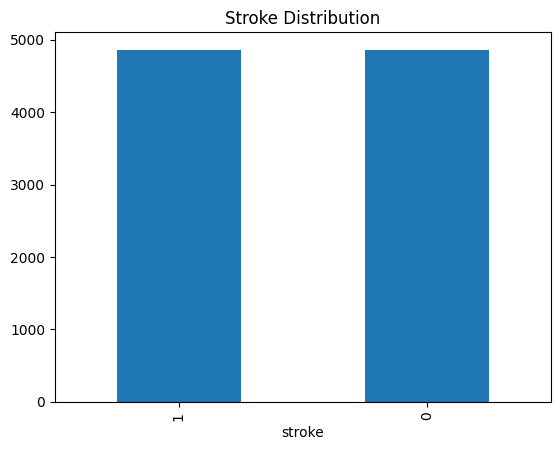

In [5]:
# Lets know how many values for stroke (0 = No stroke, 1 = Stroke)
print("stroke        : \n", df["stroke"].value_counts())
print("\n")
print(df["stroke"].value_counts(normalize=True))

# Bar plot
df["stroke"].value_counts().plot.bar(title="Stroke Distribution")

In [6]:
# Dropping the duplicate rows
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows : ",duplicate_rows.shape)

# df.drop_duplicates(inplace=True)

Number of duplicate rows :  (0, 11)


SUM : 
 gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


<Axes: >

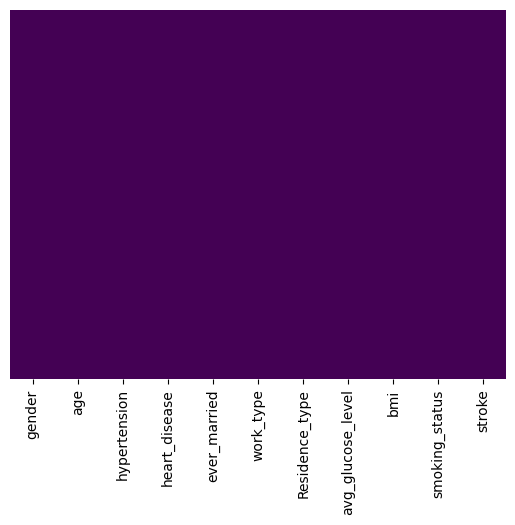

In [7]:
# To check missing values
print("SUM : \n",df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="viridis")

# df["col"] = df["col"].fillna(df["col"].mean())
# df["col"] = df["col"].fillna(df["col"].interpolate())

In [8]:
# Define X variables and our target(y)
X = df.drop(["stroke"], axis=1).values   
y = df["stroke"].values                  

print("X : ", X.shape, " y : ", y.shape)

# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# Split into train & test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y, 
    test_size=0.20, 
    random_state=100, 
    stratify=y   # strat 
)

print("X_train = ", X_train.shape, " y_train = ", y_train.shape)
print("X_test  = ", X_test.shape, " y_test  = ", y_test.shape)


X :  (9722, 10)  y :  (9722,)
X_train =  (7777, 10)  y_train =  (7777,)
X_test  =  (1945, 10)  y_test  =  (1945,)


In [9]:
# Define the model
model = keras.Sequential()

model.add(keras.layers.Dense(32,  activation="relu", input_shape = X_train.shape[1:]))

model.add(keras.layers.Dense(16, activation="relu"))

model.add(keras.layers.Dense(1, activation="sigmoid"))

d:\CS\fk\third year\DL\Tasks\ml_env\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compiling the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# Training and evaluating the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6927 - loss: 0.6003 - val_accuracy: 0.7898 - val_loss: 0.5148
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7910 - loss: 0.4848 - val_accuracy: 0.8104 - val_loss: 0.4566
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8039 - loss: 0.4506 - val_accuracy: 0.8130 - val_loss: 0.4369
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8071 - loss: 0.4360 - val_accuracy: 0.8162 - val_loss: 0.4266
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8077 - loss: 0.4261 - val_accuracy: 0.8188 - val_loss: 0.4191
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8121 - loss: 0.4183 - val_accuracy: 0.8207 - val_loss: 0.4138
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8151 - loss: 0.4129 - val_accuracy: 0.8188 - val_loss: 0.4101
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8159 - loss: 0.4070 - val_accuracy: 0.8246 - v

In [12]:
history.history

{'accuracy': [0.6926538944244385,
  0.7910304069519043,
  0.80389004945755,
  0.8071049451828003,
  0.8077479600906372,
  0.8120880722999573,
  0.8151422739028931,
  0.8159459829330444,
  0.82012540102005,
  0.8222150802612305,
  0.8254299759864807,
  0.8265551924705505,
  0.8294486403465271,
  0.8294486403465271,
  0.8296093940734863,
  0.8328242897987366,
  0.8333065509796143,
  0.8379681706428528,
  0.838128924369812,
  0.841183066368103,
  0.8458447456359863,
  0.8466484546661377,
  0.8466484546661377,
  0.8522745370864868,
  0.8551679849624634,
  0.8579006791114807,
  0.8599903583526611,
  0.856132447719574,
  0.8614370822906494,
  0.8625622987747192,
  0.8627230525016785,
  0.8630445003509521,
  0.8660987019538879,
  0.8701173663139343,
  0.869152843952179,
  0.8699566125869751,
  0.8702781200408936,
  0.8728500008583069,
  0.8744574785232544,
  0.8749397397041321,
  0.8784761428833008,
  0.8807265758514404,
  0.8792798519134521,
  0.8812088370323181,
  0.8805658221244812,
  0.88

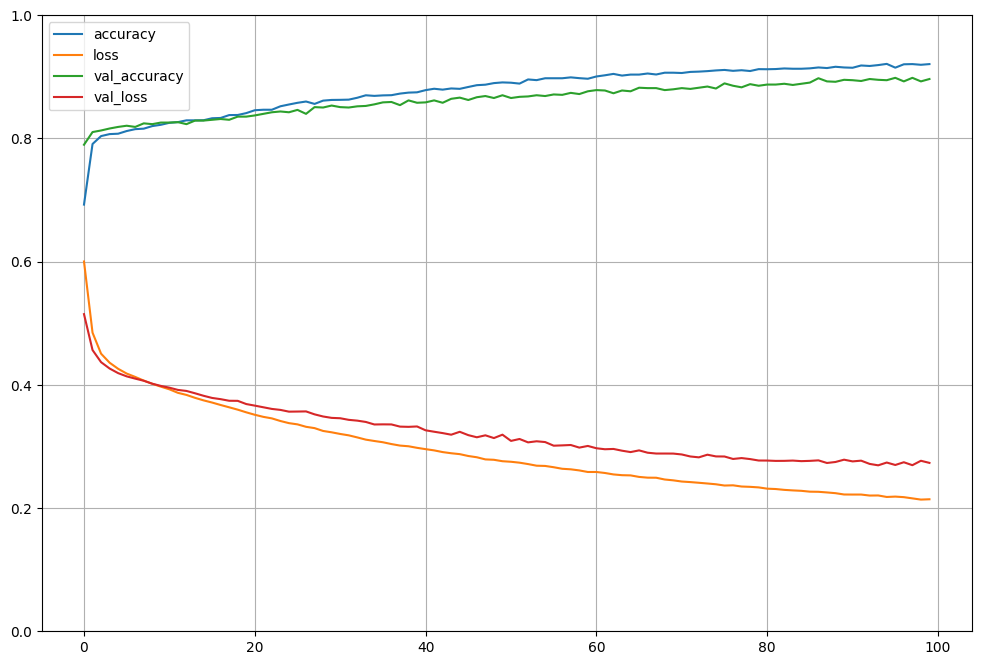

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9049 - loss: 0.2525
Loss     :  0.25254687666893005
accuracy :  0.9048843383789062


In [13]:
# Plot the learning curves
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Evaluate the model
model_evaluate = model.evaluate(X_test, y_test)
print("Loss     : ",model_evaluate[0])
print("accuracy : ",model_evaluate[1])

In [14]:
model.predict(X_test)

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[4.3971565e-01],
       [2.2827870e-04],
       [5.0965947e-01],
       ...,
       [9.0614337e-01],
       [8.5615045e-01],
       [6.8339741e-01]], shape=(1945, 1), dtype=float32)

In [15]:
y_pred = (model.predict(X_test) > 0.5).astype("int32").tolist()

y_pred

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[[0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1]

Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.85      0.90       973
           1       0.86      0.96      0.91       972

    accuracy                           0.90      1945
   macro avg       0.91      0.90      0.90      1945
weighted avg       0.91      0.90      0.90      1945

Confusion matrix : 

[[823 150]
 [ 35 937]]


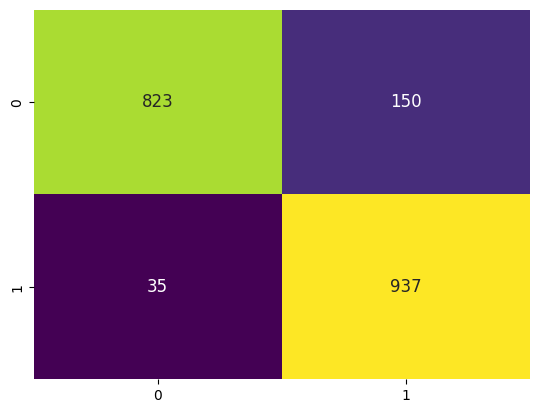

Normalized confusion matrix : 

[[0.85 0.15]
 [0.04 0.96]]


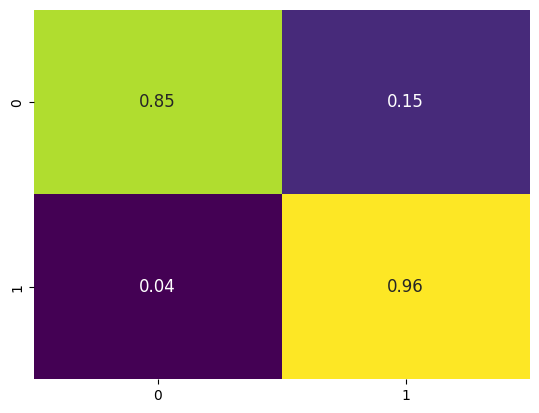

In [16]:
# Confusion Matrix

class_names = ["0", "1"]

# Compute classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report : \n",classification_report(y_test, y_pred, target_names = class_names))

# Function to draw confusion matrix
import seaborn as sns
def draw_confusion_matrix(true, preds, normalize=None):
  # Compute confusion matrix
    conf_matx = confusion_matrix(true, preds, normalize = normalize)
    conf_matx = np.round(conf_matx, 2)
    print(conf_matx)

  # plt.subplots(figsize=(14,8))
    sns.heatmap(conf_matx, annot=True, annot_kws={"size": 12},fmt="g", cbar=False, cmap="viridis")
    plt.show()

print("Confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred)

print("Normalized confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred, "true")
